Зчитати датасет ВВП (млн. дол. США) за країнами з Вікіпедії за
посиланням

First 5 rows:
  Country/Territory IMF[1][13]            World Bank[14]             \
  Country/Territory   Forecast       Year       Estimate       Year   
0             World  109529216       2024      105435540       2023   
1     United States   28781083       2024       27360935       2023   
2             China   18532633  [n 1]2024       17794782  [n 3]2023   
3           Germany    4591100       2024        4456081       2023   
4             Japan    4110452       2024        4212945       2023   

  United Nations[15]             
            Estimate       Year  
0          100834796       2022  
1           25744100       2022  
2           17963170  [n 1]2022  
3            4076923       2022  
4            4232173       2022   

Size of the dataset:
(210, 7) 

Current column names:
[('Country/Territory', 'Country/Territory'), ('IMF[1][13]', 'Forecast'), ('IMF[1][13]', 'Year'), ('World Bank[14]', 'Estimate'), ('World Bank[14]', 'Year'), ('United Nations[15]', 'Estimate'), (

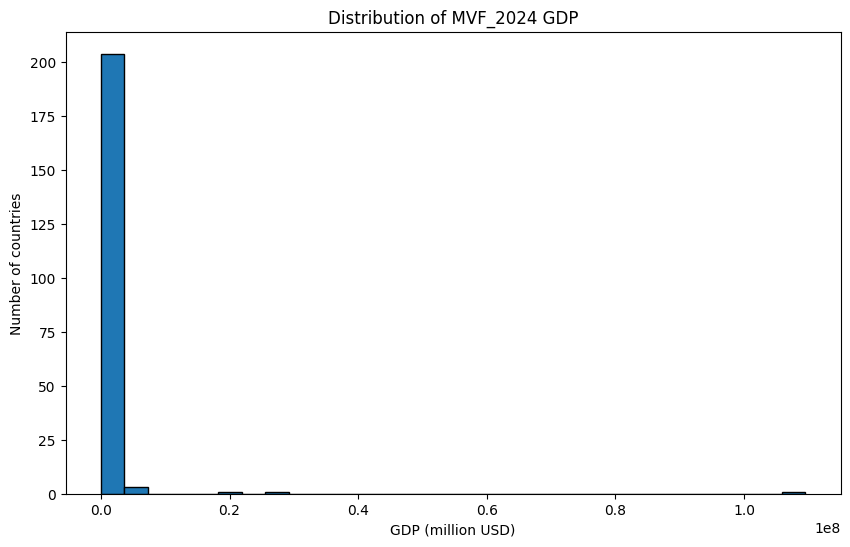

Share of each country in total GDP for each column:
              Country     Share_MVF  Share_WorldBank  Share_UN
0               World  4.643473e-01     4.840638e-01  0.004762
1       United States  1.220169e-01     1.256165e-01  0.004762
2               China  7.856878e-02     8.169741e-02  0.004762
3             Germany  1.946389e-02     2.045826e-02  0.004762
4               Japan  1.742619e-02     1.934200e-02  0.004762
..                ...           ...              ...       ...
205          Kiribati  1.318479e-06     1.280914e-06  0.004762
206             Palau  1.305761e-06     1.207456e-06  0.004762
207  Marshall Islands  1.293042e-06     1.303869e-06  0.004762
208             Nauru  6.825568e-07     7.070275e-07  0.004762
209            Tuvalu  2.798059e-07     2.846475e-07  0.004762

[210 rows x 4 columns] 



In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the table from the Wikipedia page
url = 'https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)'
tables = pd.read_html(url)

# Choose the appropriate table; adjust index if needed
gdp_table = tables[2]  # Adjust index if needed

# Display the first 5 rows
print("First 5 rows:")
print(gdp_table.head(), "\n")

# Determine the size of the dataset
print("Size of the dataset:")
print(gdp_table.shape, "\n")  # (number of rows, number of columns)

# Print current column names and number of columns
print("Current column names:")
print(gdp_table.columns.tolist())
print("Number of columns:", len(gdp_table.columns))

# Rename columns based on observed names
gdp_table.columns = ['Country', 'MVF_2024_Forecast', 'WorldBank_2023_Year', 'WorldBank_2023_Estimate',
                     'UN_2022_Estimate', 'UN_2022_Year', 'Notes']

# Display the updated columns to verify renaming
print("Updated column names:")
print(gdp_table.columns.tolist())

# 5. Determine the data types of each column
print("Data types of each column:")
print(gdp_table.dtypes, "\n")

# 6. Replace "—" with NaN and handle missing values
gdp_table.replace('—', np.nan, inplace=True)

# Convert relevant columns to numeric values, excluding non-numeric columns
numeric_columns = ['MVF_2024_Forecast', 'WorldBank_2023_Estimate', 'UN_2022_Estimate']
gdp_table[numeric_columns] = gdp_table[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Check for missing values
print("Missing values in each column:")
print(gdp_table.isna().sum(), "\n")

# Replace NaN with the mean of each column
gdp_table[numeric_columns] = gdp_table[numeric_columns].fillna(gdp_table[numeric_columns].mean())

# Recheck for missing values
print("Missing values after replacement:")
print(gdp_table.isna().sum(), "\n")

# 8. Check for and remove duplicate rows
duplicates = gdp_table.duplicated().sum()
print("Number of duplicate rows:", duplicates)
if duplicates > 0:
    gdp_table = gdp_table.drop_duplicates()

# 9. Describe the dataset
print("Descriptive statistics:")
print(gdp_table.describe(), "\n")

# 10. Calculate deviation between MVF_2024 and WorldBank_2023
gdp_table['Deviation'] = gdp_table['MVF_2024_Forecast'] - gdp_table['WorldBank_2023_Estimate']
max_deviation_idx = gdp_table['Deviation'].abs().idxmax()
print("Country with the highest deviation:")
print(gdp_table.loc[max_deviation_idx, ['Country', 'Deviation']], "\n")

# 11. Calculate correlation between MVF_2024, WorldBank_2023, and OON_2022
correlation_matrix = gdp_table[numeric_columns].corr()
print("Correlation matrix:")
print(correlation_matrix, "\n")

# 12. Calculate mean values for each column
mean_values = gdp_table[numeric_columns].mean()
print("Mean values for each column:")
print(mean_values, "\n")

# 13. Calculate standard deviation for each country
gdp_table['StdDev'] = gdp_table[numeric_columns].std(axis=1)
max_stddev_idx = gdp_table['StdDev'].idxmax()
print("Country with the highest variability:")
print(gdp_table.loc[max_stddev_idx, ['Country', 'StdDev']], "\n")

# 14. Find countries with the highest and lowest GDP values
max_mvf_idx = gdp_table['MVF_2024_Forecast'].idxmax()
min_mvf_idx = gdp_table['MVF_2024_Forecast'].idxmin()
max_wb_idx = gdp_table['WorldBank_2023_Estimate'].idxmax()
min_wb_idx = gdp_table['WorldBank_2023_Estimate'].idxmin()
max_un_idx = gdp_table['UN_2022_Estimate'].idxmax()
min_un_idx = gdp_table['UN_2022_Estimate'].idxmin()

print("Country with highest and lowest GDP values:")
print("MVF_2024 - Highest:", gdp_table.loc[max_mvf_idx, 'Country'])
print("MVF_2024 - Lowest:", gdp_table.loc[min_mvf_idx, 'Country'])
print("WorldBank_2023 - Highest:", gdp_table.loc[max_wb_idx, 'Country'])
print("WorldBank_2023 - Lowest:", gdp_table.loc[min_wb_idx, 'Country'])
print("UN_2022 - Highest:", gdp_table.loc[max_un_idx, 'Country'])
print("UN_2022 - Lowest:", gdp_table.loc[min_un_idx, 'Country'], "\n")

# 15. Plot histogram for MVF_2024
plt.figure(figsize=(10, 6))
plt.hist(gdp_table['MVF_2024_Forecast'].dropna(), bins=30, edgecolor='black')
plt.title('Distribution of MVF_2024 GDP')
plt.xlabel('GDP (million USD)')
plt.ylabel('Number of countries')
plt.show()

# 16. Calculate the share of each country
gdp_table['Share_MVF'] = gdp_table['MVF_2024_Forecast'] / gdp_table['MVF_2024_Forecast'].sum()
gdp_table['Share_WorldBank'] = gdp_table['WorldBank_2023_Estimate'] / gdp_table['WorldBank_2023_Estimate'].sum()
gdp_table['Share_UN'] = gdp_table['UN_2022_Estimate'] / gdp_table['UN_2022_Estimate'].sum()

print("Share of each country in total GDP for each column:")
print(gdp_table[['Country', 'Share_MVF', 'Share_WorldBank', 'Share_UN']], "\n")
